In [312]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import os
import time

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.style.use('ggplot')

print('start')

# 待測目標 App
#==================================================
# app_name = "omlet"
# package_name = "mobisocial.arcade"
app_name = "instagram"
package_name = "com.instagram.android"
# app_name = "youtube"
# package_name = "com.google.android.youtube"
#==================================================

# 執行次數
execute_count = 1

# 滑動次數（換頁次數）
swipe_count = 50

# 滑動秒數（ms）
swipe_speed = "500"

# adb 指令
reset_command = "adb shell dumpsys gfxinfo " + package_name +" reset"
swipe_command = "adb shell input swipe 700 1500 700 200 " + swipe_speed
framestats_command = "adb shell dumpsys gfxinfo " + package_name +" framestats"

# 資料擷取
def clip_data(data):
    output = []
    index = 0
    flag = 0
    
    for x in data:
        if flag > 0 and flag < 2:
            output.append(data[index])
        if x == '---PROFILEDATA---':
            flag += 1    
            if flag == 2:
                output.pop() 
        index += 1
    
    # 移除標頭
    output.pop(0)
    return output

info_columns_name = ['Flags', 'IntendedVsync', 'Vsync', 'OldestInputEvent', 'NewestInputEvent', 
                     'HandleInputStart', 'AnimationStart', 'PerformTraversalsStart', 'DrawStart', 
                     'SyncQueued', 'SyncStart', 'IssueDrawCommandsStart', 'SwapBuffers', 'FrameCompleted']

output_columns_name = ['Vsync', 'Handle Input', 'Animation', 'Perform Traversals', 'Draw', 
                       'Sync', 'Issue Draw Commands']

info_df = pd.DataFrame(columns = info_columns_name)
output_df = pd.DataFrame(columns = output_columns_name)

i = 0
for j in range(1, execute_count + 1):
    print("開始執行第 " + str(j) + " 次...")
    time.sleep(1)

    for k in range(1, swipe_count + 1):
        print("清理前次資料")
        subprocess.call(reset_command, shell = True)
        time.sleep(1)
        
        print("執行滑動換頁第 " + str(k) + " 次...")
        subprocess.call(swipe_command, shell = True)
        
        # 資料擷取
        info_data = os.popen(framestats_command).read().splitlines()
        info_data = clip_data(info_data)

        # 匯入 info_df 資料表
        for line in info_data:
            eachline = line.split(',')
            eachline = list(filter(None, eachline))
            if (len(eachline) == len(info_columns_name)) :
                series = pd.Series(eachline, dtype = "int", index = info_columns_name)
                info_df.loc[i] = series 
                i += 1

# 整理放入 output_df 資料表
output_df['Vsync'] = info_df['Vsync'] - info_df['IntendedVsync']
output_df['Handle Input'] = (info_df['AnimationStart'] - info_df['HandleInputStart'])/1000000
output_df['Animation'] = (info_df['PerformTraversalsStart'] - info_df['AnimationStart'])/1000000
output_df['Perform Traversals'] = (info_df['DrawStart'] - info_df['PerformTraversalsStart'])/1000000
output_df['Draw'] = (info_df['SyncStart'] - info_df['DrawStart'])/1000000
output_df['Sync'] = (info_df['IssueDrawCommandsStart'] - info_df['SyncStart'])/1000000
output_df['Issue Draw Commands'] = (info_df['FrameCompleted'] - info_df['IssueDrawCommandsStart'])/1000000
output_df['TotalTimeSpent'] = (info_df['FrameCompleted'] - info_df['IntendedVsync'])/1000000

print("end")

count = len(output_df.index)
issue = output_df.loc[output_df.TotalTimeSpent > 16, 'TotalTimeSpent'].count()

time.sleep(1)
print("--------------------")
print("Swipe Count: " + str(swipe_count) + " pages")
print("Swipe Speed: " + str(swipe_speed) + " ms")
print("Total Frame Count: " + str(count))
print("Delay Frame Count: " + str(issue))
print("Delay rate: " + str(issue/count))
time.sleep(1)
print("--------------------")

start
開始執行第 1 次...
清理前次資料
執行滑動換頁第 1 次...
清理前次資料
執行滑動換頁第 2 次...
清理前次資料
執行滑動換頁第 3 次...
清理前次資料
執行滑動換頁第 4 次...
清理前次資料
執行滑動換頁第 5 次...
清理前次資料
執行滑動換頁第 6 次...
清理前次資料
執行滑動換頁第 7 次...
清理前次資料
執行滑動換頁第 8 次...
清理前次資料
執行滑動換頁第 9 次...
清理前次資料
執行滑動換頁第 10 次...
清理前次資料
執行滑動換頁第 11 次...
清理前次資料
執行滑動換頁第 12 次...
清理前次資料
執行滑動換頁第 13 次...
清理前次資料
執行滑動換頁第 14 次...
清理前次資料
執行滑動換頁第 15 次...
清理前次資料
執行滑動換頁第 16 次...
清理前次資料
執行滑動換頁第 17 次...
清理前次資料
執行滑動換頁第 18 次...
清理前次資料
執行滑動換頁第 19 次...
清理前次資料
執行滑動換頁第 20 次...
清理前次資料
執行滑動換頁第 21 次...
清理前次資料
執行滑動換頁第 22 次...
清理前次資料
執行滑動換頁第 23 次...
清理前次資料
執行滑動換頁第 24 次...
清理前次資料
執行滑動換頁第 25 次...
清理前次資料
執行滑動換頁第 26 次...
清理前次資料
執行滑動換頁第 27 次...
清理前次資料
執行滑動換頁第 28 次...
清理前次資料
執行滑動換頁第 29 次...
清理前次資料
執行滑動換頁第 30 次...
清理前次資料
執行滑動換頁第 31 次...
清理前次資料
執行滑動換頁第 32 次...
清理前次資料
執行滑動換頁第 33 次...
清理前次資料
執行滑動換頁第 34 次...
清理前次資料
執行滑動換頁第 35 次...
清理前次資料
執行滑動換頁第 36 次...
清理前次資料
執行滑動換頁第 37 次...
清理前次資料
執行滑動換頁第 38 次...
清理前次資料
執行滑動換頁第 39 次...
清理前次資料
執行滑動換頁第 40 次...
清理前次資料
執行滑動換頁第 41 次...
清理前次資料
執行滑動換頁第 42 次...
清理前次資料
執行滑動換頁第 43 次...
清

In [310]:
# print("繪圖準備...")
# output_df.loc[:, 'Handle Input':'Issue Draw Commands'].plot(kind = 'bar', figsize = (15,10), stacked = True, title = package_name, fontsize = 16)
# plt.axhline(y = 16, color = 'r')

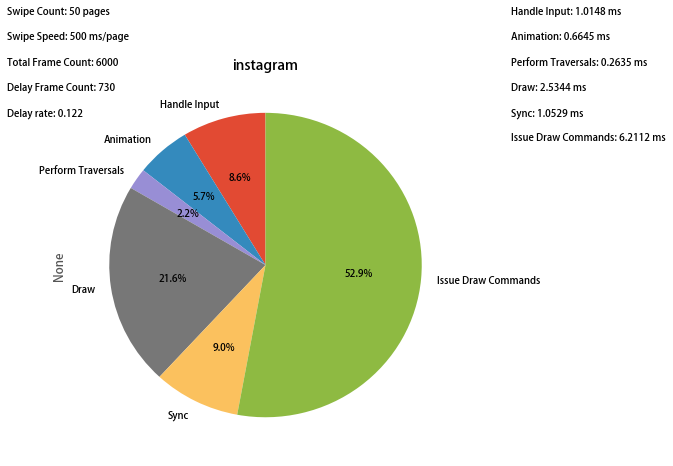

In [329]:
app_name = "instagram"
stat_sr_index = ['Handle Input', 'Animation', 'Perform Traversals', 'Draw', 
                       'Sync', 'Issue Draw Commands']

values = [output_df['Handle Input'].mean(), output_df['Animation'].mean(), 
                    output_df['Perform Traversals'].mean(), output_df['Draw'].mean(), output_df['Sync'].mean(),
                    output_df['Issue Draw Commands'].mean()]

stat_sr = pd.Series(values, index = stat_sr_index)
stat_sr.plot(kind = 'pie', figsize = (7, 7), startangle = 90, autopct = '%1.1f%%', title = app_name)

count = len(output_df.index)
issue = output_df.loc[output_df.TotalTimeSpent > 16, 'TotalTimeSpent'].count()

# Add stat
plt.figtext(0, 1, "Swipe Count: " + str(swipe_count) + " pages")
plt.figtext(0, 0.95, "Swipe Speed: " + str(swipe_speed) + " ms/page")
plt.figtext(0, 0.9, "Total Frame Count: " + str(count))
plt.figtext(0, 0.85, "Delay Frame Count: " + str(issue))
plt.figtext(0, 0.8, "Delay rate: " + str(round(issue/count, 3)))

# Add description
i = 1
for title in stat_sr_index:
    plt.figtext(1, i, title + ": " + str(round(output_df[title].mean(), 4)) + " ms")
    i -= 0.05

# Save chart    
name = app_name + '_' + str(swipe_count) + '_' + str(swipe_speed) + '.png'
plt.savefig(name, bbox_inches = "tight")

# Issue Draw Commands
>The time at which the hardware renderer started issuing drawing commands to the GPU.

### Problems like <font color="blue">too much overdraw or inefficient rendering effects</font> show up here.

# Draw
>This is the start point of recording the display lists of any views that were invalidated.

### How long it took to call <font color="blue">View.draw()</font> on all the invalidated views in the tree.

# Sync
>The time at which the sync phase of the drawing started.

### If the time between this and ISSUE_DRAW_COMMANDS_START is substantial (<font color="red">>0.4ms</font> or so), it typically <font color="blue">indicates a lot of new Bitmaps were drawn </font> which must be uploaded to the GPU.

# Handle Input
>The timestamp at which input events were dispatched to the application.

### If this number is high (<font color="red">>2ms</font>), this indicates the app is spending <font color="blue">an unusually long time processing input events, such as View.onTouchEvent()</font>, which may indicate this work needs to be optimized, or offloaded to a different thread. Note that there are some scenarios, such as click events that launch new activities or similar, where it is expected and acceptable that this number is large.

# Animation
>How long it took to evaluate all the animators (ObjectAnimator, ViewPropertyAnimator, and Transitions being the common ones) that are running.

### If this number is high (<font color="red">>2ms</font>), check to see if your app has written any custom animators or what fields ObjectAnimators are animating and ensure they are appropriate for an animation.

# Perform Traversals
>How long the layout & measure phases took to complete.

### During a scroll, or animation, you would hope this should be close to zero...

In [ ]:
def clip_data(data):
    output = []
    index = 0
    flag = 0
    
    for x in data:
        if flag > 0 and flag < 2:
            output.append(data[index])
        if x == '---PROFILEDATA---':
            flag += 1    
            if flag == 2:
                output.pop() 
        index += 1
    
    # 移除標頭
    output.pop(0)
    return output

subprocess.call("adb shell dumpsys gfxinfo mobisocial.arcade reset", shell = True)
subprocess.call("adb shell input swipe 700 1500 700 200 500", shell = True)

info_data = os.popen("adb shell dumpsys gfxinfo mobisocial.arcade framestats | grep -A 1200 'PROFILEDATA'").read().splitlines()
info_data = clip_data(info_data)
len(info_data)
# info_data